Junzhe Wang
10437308

In [1]:
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string impopunctuationrt 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from keras.models import Sequential
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from keras.layers import Activation, Dense, Dropout, BatchNormalization
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelBinarizer
from keras.callbacks import TensorBoard
import itertools
import matplotlib.pyplot as plt
from numpy import random

ModuleNotFoundError: No module named 'keras'

In [3]:
# gradient descent
# calculate the hypothesis : 
# x training data, sample * valcabulary_size
def bgd(x, y, alpha, epoch):
    x_trans = x.transpose()
    loss_all = []
    # initialize weights
    w = random.rand(x.shape[1], 3)
    n = x.shape[0] # number of training sample
    for i in range(epoch):
        hypothesis = x.dot(w) # compute y_prediction
        loss = (hypothesis - y)
        gradient = x_trans.dot(loss)/n # compute gradient
        w -= alpha * gradient # update w
#         if not(i % 100):
#             print(sum(loss))
        loss_all.append(sum(loss[0]))
    return w, loss_all


In [7]:
x = np.asmatrix([[1,2,3,4,5], [5,6,7,8,9],[2,4,6,7,8]])
y = [11,32,26]

In [13]:
x_trans = x.transpose()
loss_all = []
# initialize weights
w = random.rand(x.shape[1], x.shape[0])
n = x.shape[0] # number of training sample

In [15]:
hypothesis = x.dot(w)

In [16]:
loss = (hypothesis - y)

In [18]:
loss

matrix([[ -2.42570753, -23.46606557, -18.27626579],
        [  6.58850198, -12.26441589,  -6.44464404],
        [  3.75195494, -16.26092535, -11.90783477]])

In [20]:
x_trans

matrix([[1, 5, 2],
        [2, 6, 4],
        [3, 7, 6],
        [4, 8, 7],
        [5, 9, 8]])

In [17]:
gradient = x_trans.dot(loss)/n

In [19]:
gradient

matrix([[  12.67357075,  -39.1033319 ,  -24.77171851],
        [  16.56247219,  -61.85410929,  -40.9505783 ],
        [  20.45137363,  -84.60488667,  -57.12943809],
        [  23.08962342, -101.9353556 ,  -69.33901962],
        [  25.72787322, -119.26582454,  -81.54860116]])

In [8]:
w, loss = bgd(x, y, 0.1, 1)

In [9]:
w

array([[-0.90676767,  5.79026013,  2.81771564],
       [-1.32633204,  8.98075025,  5.12630514],
       [-1.84164747, 11.49041511,  6.03798887],
       [-2.65598722, 13.8592307 ,  7.43300303],
       [-2.27432498, 15.56237172,  9.14207279]])

In [10]:
loss

[matrix([[ -2.82008202, -26.55177316, -17.67837627]])]

In [29]:
# calculate the hypothesis : 
# x training data, sample * valcabulary_size
def sgd(x, y, alpha, epoch):
    loss_all = []
    x_trans = x.transpose()
    # initialize weights
    w = random.rand(x.shape[1], 3)
    n = x.shape[0] # number of training sample
    for i in range(epoch):
        for j in range(n):
            r = random.randint(0,n) # equals to shuffle the dataset 
            hypothesis = x[r,:].dot(w) # compute prediction
            loss = hypothesis - y[0,:] 
            loss_all.append(sum(loss[0]))
            gradient = x_trans[:, r].dot(loss)  # compute gradient
            w -= alpha * gradient # update w
#         if not(i % 100):
#             print(sum(loss))
    return w, loss_all

In [5]:
# read in file 
def read_book(file):
    folder = 'data 2'
    file_path = folder + '/' + file
    f = open(file_path)
    text = f.read().strip()
    paras = list(text.split("\n\n") )  # divide as paragraphs
    f.close()
    print(len(paras))
    return paras

def preprocess(text):  # text is a string list, for one paragraph 
    # remove line breaks 
    text = text.strip()
    text = text.replace('\r', ' ').replace('\n', ' ')
    text = ' '.join(text.split())
    
    # remove punctuations from paragraphs
    text = ''.join(c for c in text if c not in punctuation)
    # change 's 
    text = re.sub('\t', ' ', text)
    text = re.sub(r"it\'s","it is",text)
    text = re.sub(r"i\'d","i would",text)
    text = re.sub(r"I\'d","I would",text)
    text = re.sub(r"don\'t","do not",text)
    text = re.sub(r"he\'s","he is",text)
    text = re.sub(r"there\'s","there is",text)
    text = re.sub(r"that\'s","that is",text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"cannot", "can not ", text)
    text = re.sub(r"what\'s", "what is", text)
    text = re.sub(r"What\'s", "what is", text)
    text = re.sub(r"\'ve ", " have ", text)
    text = re.sub(r"n\'t", " not ", text)
    text = re.sub(r"i\'m", "i am ", text)
    text = re.sub(r"I\'m", "I am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'s"," is",text)
    
    text = re.sub('[^a-zA-Z]', ' ', text)  # only keep characters
    p = text.lower()  # to lowercase
    
    # remove line breaks 
    text = text.strip()
    text = text.replace('\r', ' ').replace('\n', ' ')
    text = ' '.join(text.split())
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    filtered = [w for w in tokens if not w in stop_words]  #remove stopwords
    non_rome = [r for r in filtered if not bool(re.match(rome, r))]
    
    return ' '.join(non_rome) # return filtered



In [6]:
books = ['28054-0.txt', 'pg1661.txt', 'pg31100.txt'] # Fyodor Dostoyevsky, Conan Doyle, Jane Austen
authors =  ['Fyodor Dostoyevsky', 'Conan Doyle', 'Jane Austen']
stop_words = set(stopwords.words('english'))   # REMOVE STOP WORDS
thousand = 'm{0,3}'   # REMOVE ROME NUMBER SUCH AS I, II, III, IV, V...
hundred = '(c[mc]|d?c{0,3})'
ten = '(x[cl]|l?x{0,3})'
digit = '(i[vx]|v?i{0,3})'
rome = thousand + hundred + ten + digit +'$'

In [7]:
book_01 = read_book(books[0])
book_02 = read_book(books[1])
book_03 = read_book(books[2])

6191
2627
11592


In [8]:
# remove the preface
book_01 = book_01[26:]
book_02 = book_02[17:]
book_03 = book_03[44:]
dataset = []

In [11]:
paras01 = []
for p in book_01:
    ppre = preprocess(p)
    if len(ppre) > 0:
        paras01.append(ppre)
print('length of book01 is ', len(paras01))
dataset.extend(paras01)

length of book01 is  5991


In [12]:
paras02 = []
for p in book_02:
    ppre = preprocess(p)
    if len(ppre) > 0:
        paras02.append(ppre)
print('length of book02 is ', len(paras02))
dataset.extend(paras02)

length of book02 is  2546


In [13]:
paras03 = []
for p in book_03:
    ppre = preprocess(p)
    if len(ppre) > 0:
        paras03.append(ppre)
print('length of book02 is ', len(paras03))
dataset.extend(paras03)

length of book02 is  10998


In [14]:
len(dataset)

19535

In [15]:
# labels for (stochastic) gradient descent
labels = []
labels01 = [[1, 0, 0]] * len(paras01)
labels02 = [[0, 1, 0]] * len(paras02)
labels03 = [[0, 0, 1]] * len(paras03)
labels.extend(labels01)
labels.extend(labels02)
labels.extend(labels03)

In [16]:
# labels for multi layer 
y_mlp01 = [1]* len(paras01)
y_mlp02 = [2]* len(paras02)
y_mlp03 = [3]* len(paras03)
y_mlp = []
y_mlp.extend(y_mlp01)
y_mlp.extend(y_mlp02)
y_mlp.extend(y_mlp03)

In [19]:
# training and testing dataset for model 1
xtrain = [] # trainging data
xval = [] # testing data
ytrain = [] # training labels
yval = [] # testing labels
for paras, labels in [(paras01,labels01), (paras02,labels02), (paras03,labels03)]:
    xt, xv, yt, yv = train_test_split(paras, labels, test_size=0.2, random_state=42)
    xtrain.extend(xt)
    xval.extend(xv)
    ytrain.extend(yt)
    yval.extend(yv)

In [20]:
# training and testing dataset for multi layer
xtrain_mlp = [] # trainging data
xval_mlp = [] # testing data
ytrain_mlp = [] # training labels
yval_mlp = [] # testing labels
for paras, labels in [(paras01,y_mlp01), (paras02,y_mlp02), (paras03,y_mlp03)]:
    xt, xv, yt, yv = train_test_split(paras, labels, test_size=0.2, random_state=42)
    xtrain_mlp.extend(xt)
    xval_mlp.extend(xv)
    ytrain_mlp.extend(yt)
    yval_mlp.extend(yv)

In [21]:
# TF-IDF features for model 1
vectorizer = TfidfVectorizer()
x_train_vec = vectorizer.fit_transform(xtrain) # fit tfidf vectorizer with only training data, 
x_val_vec = vectorizer.transform(xval) # transform validation data to vector

print('the shape of training data: ', len(xtrain))
print('the shape of transformed training data: ',x_train_vec.shape)
print('the shape of validation data: ',len(xval))
print('the shape of transformed validation data: ',x_val_vec.shape)

the shape of training data:  15626
the shape of transformed training data:  (15626, 24299)
the shape of validation data:  3909
the shape of transformed validation data:  (3909, 24299)


In [22]:
# train with gradient_descent
w_bgd, loss_bgd = bgd(x_train_vec, ytrain, 0.1, 10000)

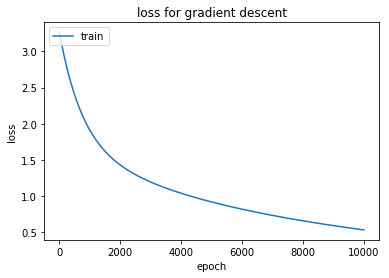

In [23]:
plt.plot(loss_bgd)
plt.title('loss for gradient descent')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
y_bgd = x_val_vec.dot(w_bgd) # compute y_prediction
loss_bgd = sum(y_bgd - yval)/x_val_vec.shape[0] # compute test loss 

In [25]:
loss_bgd

array([-0.03249478, -0.02371718, -0.04359973])

In [26]:
y_bgd_pred = list(np.argmax(y_bgd, axis=1) + 1)

stochastic gradient descent

In [30]:
# train with stochastic 
w_sgd , loss_sgd = sgd(x_train_vec, np.array(ytrain), 0.01, 100)

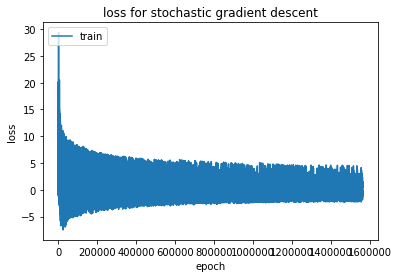

In [31]:
plt.plot(loss_sgd)
plt.title('loss for stochastic gradient descent')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
loss_sgd[0]

3.3352112607039714

In [33]:
y_sgd = x_val_vec.dot(w_sgd) # compute y_prediction
loss_sgd = sum(y_sgd - yval)/x_val_vec.shape[0] # compute test loss

In [34]:
loss_sgd

array([ 0.53422247, -0.16256332, -0.59310326])

In [36]:
tensorboard = TensorBoard(log_dir = 'mlp_log')
cb_list = [tensorboard]

In [37]:
# encode labels
vocab_size = 20000

In [38]:
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(xtrain_mlp)

In [39]:
xtrain_mlp = tokenizer.texts_to_matrix(xtrain_mlp, mode='tfidf')
xtest_mlp = tokenizer.texts_to_matrix(xval_mlp, mode='tfidf')

In [40]:
batch_size = 64 # implement minibatch 
num_epochs = 10

In [41]:
# build a MLP MODEL
model = Sequential()
model.add(Dense(8, input_shape=(vocab_size, )))
model.add(BatchNormalization())
# model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 160008    
_________________________________________________________________
batch_normalization_1 (Batch (None, 8)                 32        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                144       
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dropout_2 (Dropout)  

In [42]:
opt = SGD
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy']
             )

In [43]:
history = model.fit(xtrain_mlp, np.array(ytrain),
                   batch_size=batch_size,
                   epochs=num_epochs, 
                   verbose=1,
                   validation_split=0.2,
                   callbacks=cb_list)

Instructions for updating:
Use tf.cast instead.
Train on 12500 samples, validate on 3126 samples
Epoch 1/10
12500/12500 [==============================] - 6s 458us/step - loss: 1.0124 - acc: 0.5297 - val_loss: 0.4615 - val_acc: 0.8679
Epoch 2/10
12500/12500 [==============================] - 4s 345us/step - loss: 0.6948 - acc: 0.7098 - val_loss: 0.2913 - val_acc: 0.9101
Epoch 3/10
12500/12500 [==============================] - 3s 206us/step - loss: 0.5820 - acc: 0.7619 - val_loss: 0.2611 - val_acc: 0.9075
Epoch 4/10
12500/12500 [==============================] - 3s 203us/step - loss: 0.5358 - acc: 0.7884 - val_loss: 0.2840 - val_acc: 0.8919
Epoch 5/10
12500/12500 [==============================] - 3s 204us/step - loss: 0.4957 - acc: 0.8066 - val_loss: 0.2444 - val_acc: 0.9021
Epoch 6/10
12500/12500 [==============================] - 3s 208us/step - loss: 0.4678 - acc: 0.8203 - val_loss: 0.2674 - val_acc: 0.8922
Epoch 7/10
12500/12500 [==============================] - 2s 199us/step - l

In [44]:
score = model.evaluate(xtest_mlp, np.array(yval),
                       batch_size=batch_size, verbose=1)

3909/3909 [==============================] - 1s 338us/step


In [45]:
score[1] # test accuracy

0.8610897927858787

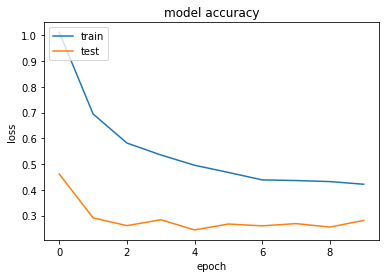

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

compare the result of bgd and sgd

In [92]:
bgd_pred = x_val_vec.dot(w_bgd) # compute prediction for gradient descent
sgd_pred = x_val_vec.dot(w_sgd) # compute prediction for stochastic gradient descent
mlp_pred = model.predict(xtest_mlp) # compute prediction for mlp
bgd_result = []
sgd_result = []
mlp_result = []
for i in range(bgd_pred.shape[0]):
    bgd_result.append(np.argmax(bgd_pred[i]) + 1)
    sgd_result.append(np.argmax(sgd_pred[i]) + 1)
    mlp_result.append(np.argmax(mlp_pred[i]) + 1)

In [94]:
count_bgd = 0
count_sgd = 0
count_mlp = 0
for i in range(len(yval_mlp)):
    if yval_mlp[i] == bgd_result[i]:
        count_bgd += 1
    if yval_mlp[i] == sgd_result[i]:
        count_sgd += 1
    if yval_mlp[i] == mlp_result[i]:
        count_mlp += 1
    

Text(0.5, 1.0, 'How many test case are correct')

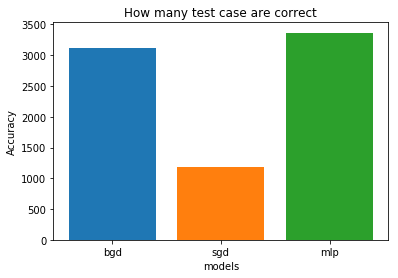

In [95]:
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
p1 = ax.bar('bgd', count_bgd)
p2 = ax.bar('sgd', count_sgd)
p3 = ax.bar('mlp', count_mlp)

ax.set_ylabel('Accuracy')
ax.set_xlabel('models')
ax.set_title('How many test case are correct')
